# Introdução

# Importar Bibliotecas e Extrair Dados

## Importar Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import norm

## Extrair Dados

Para meu portfólio, irei escolher alguns ativos arbitrários e hipotéticos. No caso, irei trazer um ativo do setor bancário, um do setor de petróleo e gás, um do setor de mineração e um do setor de consumo e varejo, respectivamente:

- Banco Itaú - ITSA4
- Petrobras - PETR4
- Vale - VALE3
- Via Varejo - VIIA3

Tentarei, portanto, montar uma carteira com esses ativos. Mas para termos uma carteira, também será necessário definir qual os pesos de cada ação em meu portfólio.
Como proposta inicial, criarei um portfólio de pesos $1/n$, ou seja, dividirei os patrimônio de forma igualitária na carteira.


In [4]:
ativos = ['ITSA4.SA','PETR4.SA','VALE3.SA','VIIA3.SA']
pesos = np.array([1/len(ativos),1/len(ativos),1/len(ativos),1/len(ativos)])
pesos

array([0.25, 0.25, 0.25, 0.25])

Para esse desenvolvimento, irei utilizar dados entre 01/01/2016 a 31/12/2020 como meus dados "out of sample".

In [5]:
cotacao_ativos = yf.download(ativos, start='2016-01-01', end= '2020-12-31')['Adj Close']
cotacao_ativos.head()

[*********************100%***********************]  4 of 4 completed


,ITSA4.SA,PETR4.SA,VALE3.SA,VIIA3.SA
Date,,,,
2016-01-04,2.972658,2.435921,7.997641,1.193003
2016-01-05,3.022205,2.368552,7.890501,1.242712
2016-01-06,3.049228,2.269272,7.310687,1.242712
2016-01-07,3.004189,2.219632,6.875828,1.173120
2016-01-08,3.004189,2.223178,6.642642,1.173120


Também irei puxar o histórico do IBOVESPA no mesmo período para poder fazer futuras comparações de Benchmark

In [21]:
ibovespa = yf.download('^BVSP',start='2016-01-01', end= '2020-12-31')['Adj Close']
ibovespa = ibovespa.to_frame()
ibovespa.rename(columns={'Adj Close': 'IBOV'}, inplace= True)
ibovespa.head()

[*********************100%***********************]  1 of 1 completed


,IBOV
Date,
2016-01-04,42141.0
2016-01-05,42419.0
2016-01-06,41773.0
2016-01-07,40695.0
2016-01-08,40612.0


# Calculando o Retorno do Porfólio

Com a extração desses dados feita, vou começar a ajustar os preços para calcularmos os retornos. Além disso, também devemos calcular os retornos diários e em seguida gráficar os retornornos e a distribuiçaão de retornos de cada ativo para começarmos a ter um vislumbre inicial dos nossos dados extraídos.

In [6]:
retorno_diario_ativos = cotacao_ativos.pct_change()
retorno_diario_ativos

,ITSA4.SA,PETR4.SA,VALE3.SA,VIIA3.SA
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,0.016667,-0.027657,-0.013396,0.041667
2016-01-06,0.008941,-0.041916,-0.073483,0.000000
2016-01-07,-0.014771,-0.021875,-0.059483,-0.056000
2016-01-08,0.000000,0.001597,-0.033914,0.000000
...,...,...,...,...
2020-12-22,0.001758,0.009623,0.000921,-0.013003
2020-12-23,0.023684,0.024560,0.004831,0.011920
2020-12-28,0.011140,0.008229,-0.000572,0.028518


In [7]:
retorno_diario_ativos_acm = (1+retorno_diario_ativos).cumprod()

In [8]:
fig0 = go.Figure()
fig0.add_trace(go.Scatter(name='Cotação de '+ativos[0], x= retorno_diario_ativos_acm.index, y=retorno_diario_ativos_acm[ativos[0]]))
fig0.add_trace(go.Scatter(name='Cotação de '+ativos[1], x= retorno_diario_ativos_acm.index, y=retorno_diario_ativos_acm[ativos[1]]))
fig0.add_trace(go.Scatter(name='Cotação de '+ativos[2], x= retorno_diario_ativos_acm.index, y=retorno_diario_ativos_acm[ativos[2]]))
fig0.add_trace(go.Scatter(name='Cotação de '+ativos[3], x= retorno_diario_ativos_acm.index, y=retorno_diario_ativos_acm[ativos[3]]))
fig0.show()

fig1 = make_subplots(1,4)
fig1.add_trace(go.Histogram(name=ativos[0], x= retorno_diario_ativos[ativos[0]],nbinsx=60), row=1, col=1)
fig1.add_trace(go.Histogram(name=ativos[1], x= retorno_diario_ativos[ativos[1]],nbinsx=60), row=1, col=2)
fig1.add_trace(go.Histogram(name=ativos[2], x= retorno_diario_ativos[ativos[2]],nbinsx=60), row=1, col=3)
fig1.add_trace(go.Histogram(name=ativos[3], x= retorno_diario_ativos[ativos[3]],nbinsx=60), row=1, col=4)
fig1.show()


Nesse primeiro momento, conseguimos extrair alguns insights:

1. A VIIA3 foi o ativo com melhor desempenho dessa carteira, enquanto a ITSA4 foi o ativo com o pior.
    
    1.a. Nota-se que isso não indica, necessariamente, que o desempenho do ITSA4 foi ruim.

    1.b. Esse desempenho não garante que o ativo teve a melhor relação de risco-retorno.

2. Para os quatro ativos, temos uma distribuição de retornos que, de certa forma, pode nos lembrar de uma distribuição normal.
    
    2.a. Obviamente não podemos ter certeza do tipo de distribuição sem fazer os devidos testes de normalidade.

Agora, vamos calcular o retorno da carteira. Para isso, é preciso multiplicar os nossos retornos diários pelo peso estipulado anteriormente e somar os resultados:

In [9]:
retorno_diario_portfolio = (retorno_diario_ativos * pesos).sum(axis=1)
retorno_diario_portfolio = retorno_diario_portfolio.to_frame()
retorno_diario_portfolio.columns = ['Retornos']
retorno_diario_portfolio

,Retornos
Date,
2016-01-04,0.000000
2016-01-05,0.004320
2016-01-06,-0.026614
2016-01-07,-0.038032
2016-01-08,-0.008079
...,...
2020-12-22,-0.000175
2020-12-23,0.016249
2020-12-28,0.011829


Agora, vamos fazer uma rápida análise descritiva sobre o retorno desse portfólio. Para isso, irei construir um histograma para entender a distribuição desses retornos. Caso tenhamos uma distribuição normal, o formato de nosso histograma deverá ser dado pela equação da curva gausseana:

\begin{equation}
f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
\end{equation}

no qual $\mu$ é a média e $\sigma$ o desvio padrão.

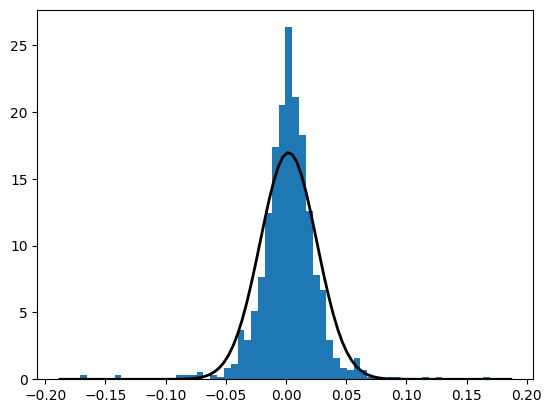

In [10]:
mu, sigma = norm.fit(retorno_diario_portfolio) 
plt.hist(retorno_diario_portfolio,density=True, bins=60);
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)

plt.plot(x, p, 'k', linewidth=2)
  
plt.show()

O que podemos notar é que esse histograma, assim como os histogramas dos ativos individuais, nos lembra uma distribuição normal, ou seja, devemos ter retornos positivos ou negativos que estão próximos à média ocorrendo com maior frequência do que as grandes variações diárias.

Porém, o histograma nos mostra claramente que os retornos do nosso portfólio são mais consistentes em torno da média do que uma distribuição normal teórica. Além disso, é possível ver a presença de alguns outliers nas caudas, ou seja, enquanto a distribuição normal tende rápidamente à zero, nossa série histórica apresenta alguns eventos extremos.

Por fim, vamos entender as medidas descritivas desse retorno:

In [11]:
retorno_diario_portfolio.describe()

,Retornos
count,1245.000000
mean,0.002005
std,0.023533
min,-0.170848
25%,-0.009136
50%,0.002094
75%,0.013842
max,0.169619


Temos 1245 retornos estudaddos nessa amostra.
O interessante de se perceber aqui é que a média é de 0,2% enquanto a mediana (o quartil de 50%) também é de 0,2%. Como a média e a mediana são muito próximas, podemos assumir que essa distribuição tem baixíssima assimetria.

A amplitude dessa amostra é de 0,34 p.p., indo de -0,17% até 0,17%.

Por questão de completeza, vamos calcular o retorno acumulado desse portfólio, para entendermos a movimentação do ativo no tempo.

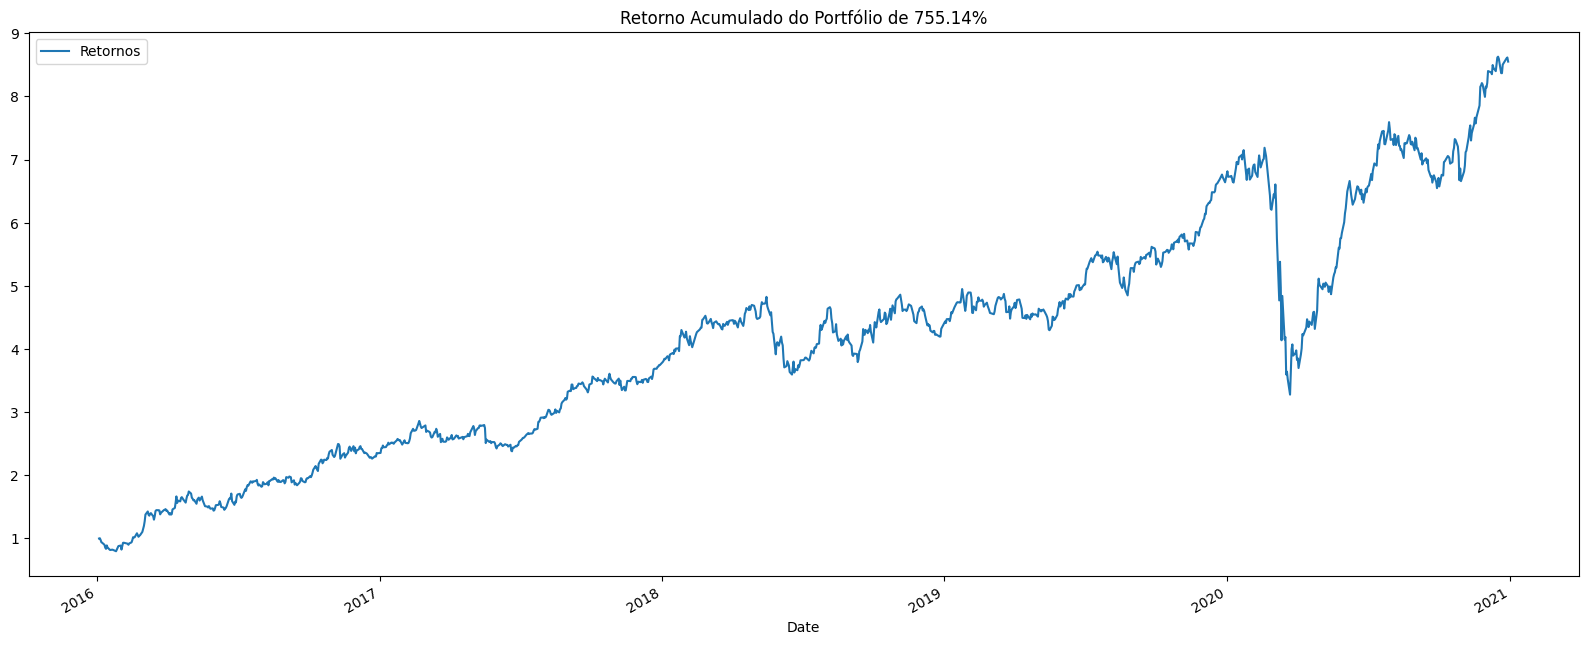

In [12]:
retorno_diario_portfolio_acum = (1 + retorno_diario_portfolio).cumprod()
titulo = f'Retorno Acumulado do Portfólio de {round((retorno_diario_portfolio_acum.iloc[-1][0]-1)*100,2)}%'
retorno_diario_portfolio_acum.plot(figsize=(20,8), title=titulo);


Portanto, vemos que o nosso retorno acumulado no período é de 755,14%, tendo apresentado uma queda mais expressiva em 2020 por conta do impacto da pandemia de COVID-19.

# Volatilidade da Carteira

Apesar da arteira ter apresentado um retorno bem expressivo, é importante notar que escolher uma carteira por conta exclusiva do retorno pode ser um erro e apresenta uma série de riscos. Para tentarmos entender um pouco do risco-retorno dessa carteira, primeiro é preciso calcular a volatilidade de nossa carteira.

Quando analisamos uma ação, o indicado pode é utilizar o desvio padrão como nossa volatilidade. Aqui, porém, não poderemos fazer isso de forma tão simplificada, uma vez que nosso portfólio apresenta um conjunto de ativos distintos, cada um com seu risco intrínseco e, para dificultar mais a análise, os ativos podem ser correlacionados entre si, o que faz com que o risco total do porfólio não possa ser uma simples combinação dos riscos individuais.

Para se calcular, portanto, o risco (volatilidade) de um porfólio, teremos a poderação da volatilidade individual de cada um dos dos ativos pelo seu peso no portfólio e também o risco associado à correlação entre os ativos. A equação matemática que descreve essa correlação é:

\begin{equation}
\sigma_p = \sqrt{w^{T} \cdot Cov \cdot w}
\end{equation}

No qual $w$ é o vetor de pesos como $1/n$ e $Cov$ é a matriz de Covariancia.

Lembrando aqui que a covariancia entre dois ativos defino o comportamento entre eles, ou seja, se:
- A Covariancia é Positiva: o retorno de um ativo vai acompanhar o outro, quando um sobe, o outro também tende a subir.
- A Covariancia é Negativa: o retorno de um ativo vai acompanhar inversamente o outro, quando um sobe, o outro tende a cair.
- A Covariancia é Nula: os ativos não impactam um ao outro.

Portanto, o nosso primeiro passo aqui será construir essa matriz de covariância para equacionar com os pesos definidos anteriormente e encontrarmos a volatilidade.

In [13]:
matriz_cov = retorno_diario_ativos.cov()
matriz_cov

,ITSA4.SA,PETR4.SA,VALE3.SA,VIIA3.SA
ITSA4.SA,0.000418,0.000413,0.000225,0.000317
PETR4.SA,0.000413,0.001078,0.000508,0.000484
VALE3.SA,0.000225,0.000508,0.000927,0.000324
VIIA3.SA,0.000317,0.000484,0.000324,0.001901


In [14]:
volatilidade_diaria_carteira = np.sqrt(np.dot(pesos.T,np.dot(matriz_cov,pesos)))
volatilidade_diaria_carteira

0.0235422771816957

Para que nossa volatilidade seja comparável com as demais grandezas anuais que teremos no decorrer do estudo, irei anualizar essa volatilidade, utilizando 252 como o número de dias úteis no ano.

In [15]:
volatilidade_anualizada_carteira = volatilidade_diaria_carteira*np.sqrt(252)
volatilidade_anualizada_carteira

0.3737220643135044

Portanto, nossa volatilidade anualizda é de 37,4%.

# Comparação com o IBOVESPA

## Primeiros Gráficos

Vou começar a fazer a comparação de nosso portfólio com o IBOVESPA. Lembrando que o mais indicado para fazer essa comparação é com o IBOVESPA porque estamos trabalhando com uma carteira forma de ações, que são ativos de renda variável.

Inicialmente vamos calcular e gráficar o retorno acumulado do IBOV.

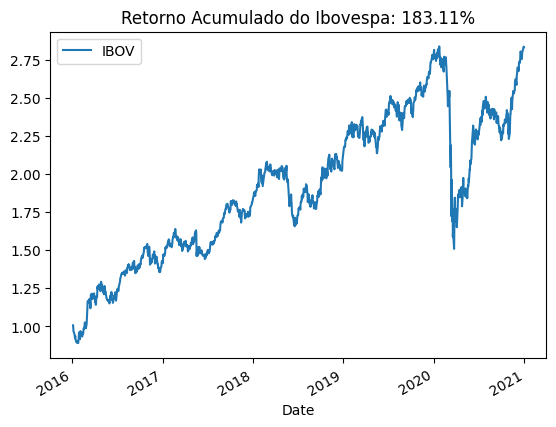

In [36]:
ibovespa_retorno_diario = ibovespa.pct_change()
ibovespa_retorno_diario.dropna(inplace=True)
ibovespa_retorno_diario_acum = (1 + ibovespa_retorno_diario).cumprod()
ibovespa_retorno_diario_acum.plot(title= f'Retorno Acumulado do Ibovespa: {round((ibovespa_retorno_diario_acum.iloc[-1][0]-1)*100,2)}%');

Vemos que o IBOVESPA quase dobrou no período. Vamos então graficar a comparação de nosso portfólio com esse benchmark.

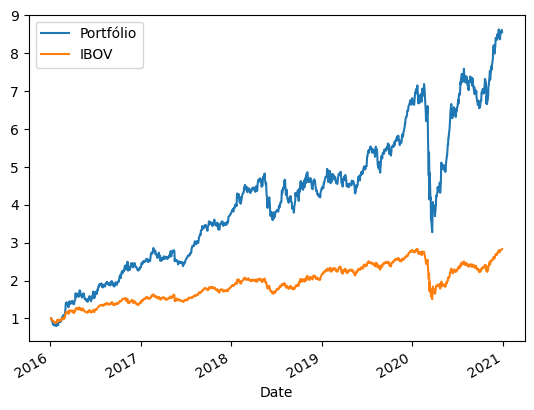

In [38]:
comparação_benchmark = pd.merge(retorno_diario_portfolio_acum, ibovespa_retorno_diario_acum, how='inner', left_index=True, right_index=True)
comparação_benchmark.rename(columns={'Retornos': 'Portfólio'},inplace=True)
comparação_benchmark.plot();

## Calculando o Beta do Portfólio